Import

In [236]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from fastai import *
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, f1_score, accuracy_score
import math

Read data set

In [237]:
df_redwine = pd.read_csv("../data/winequality-red.csv",delimiter=";")
df_whitewine = pd.read_csv("../data/winequality-white.csv",delimiter=";")


In [238]:
df_redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [239]:
df_whitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Drop duplicates

In [240]:
df_redwine = df_redwine.drop_duplicates(subset=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality" ])
df_redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [241]:
df_whitewine = df_whitewine.drop_duplicates(subset=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality" ])
df_whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


delete outliers

In [242]:
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df))
    df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    return df_no_outliers
df_redwine = remove_outliers_zscore(df_redwine)
df_whitewine = remove_outliers_zscore(df_whitewine)

In [243]:
df_redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [244]:
df_whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


visualize

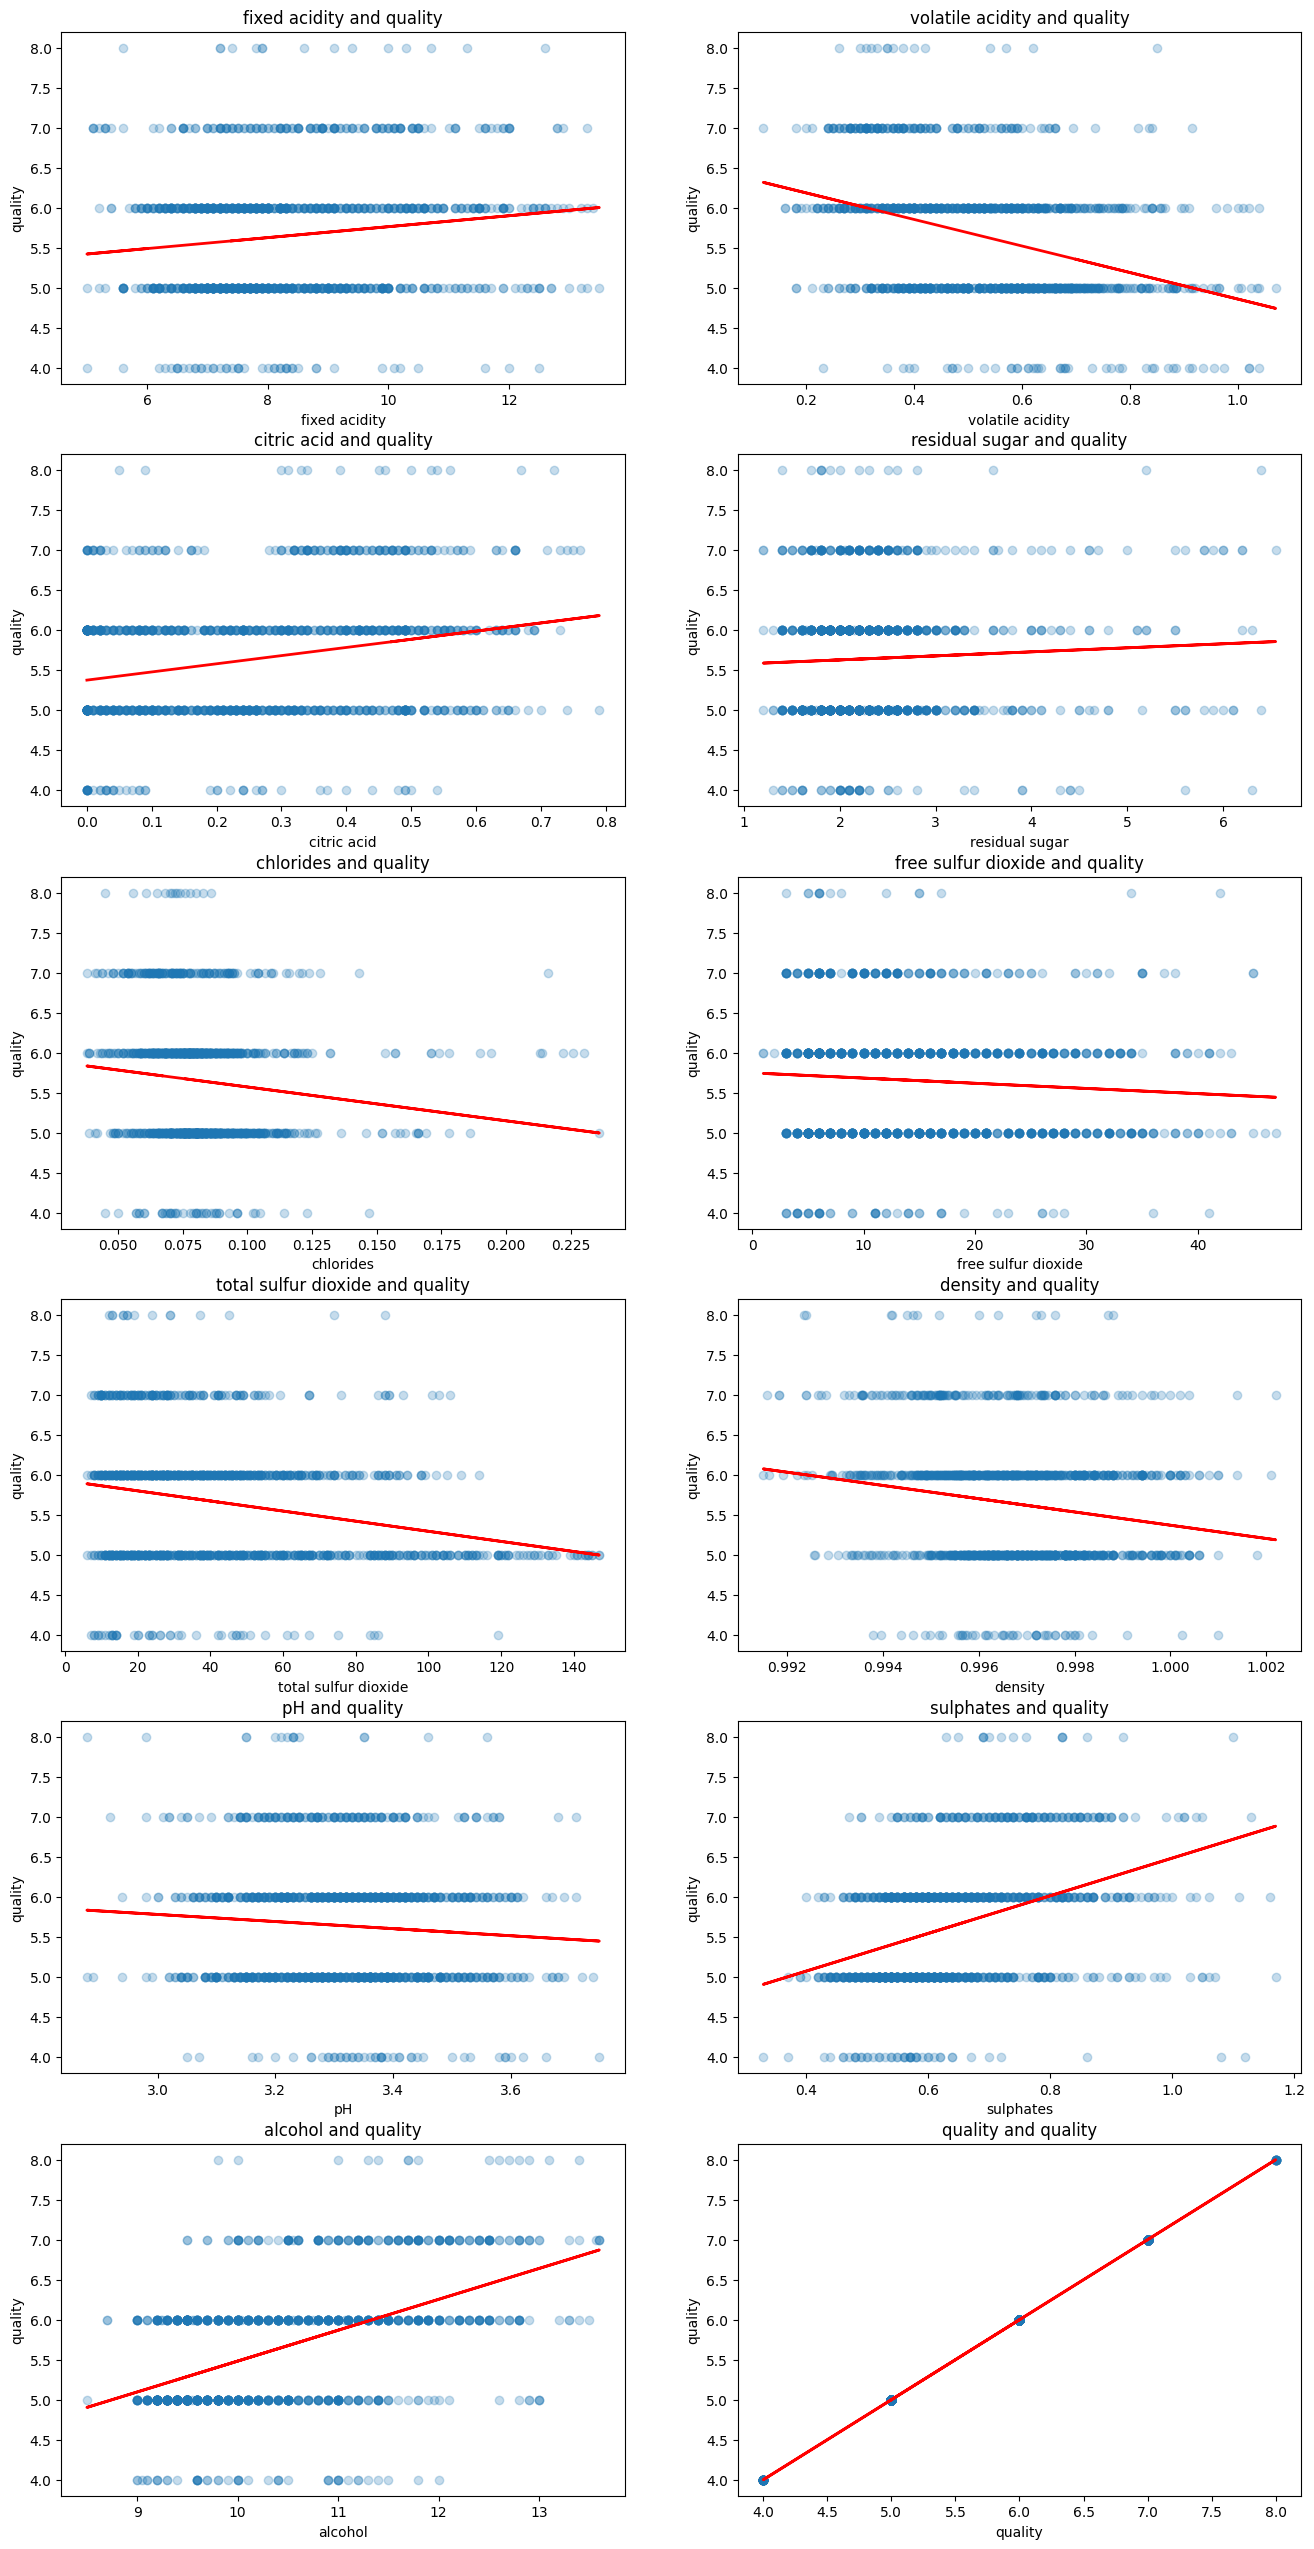

In [245]:
col = df_redwine.shape[1]//2
fig, axes = plt.subplots(nrows=col,ncols=2,figsize=(16,32))
for i in range(0,col):
    for j in range(0,2):
        axes[i,j].scatter(df_redwine.iloc[:,(i*2+j)], df_redwine["quality"], alpha=0.25)
        axes[i,j].set_title(df_redwine.columns[i*2+j]+" and quality")
        axes[i,j].set_ylabel("quality")
        axes[i,j].set_xlabel(df_redwine.columns[i*2+j])
        X = df_redwine.iloc[:,(i*2+j)].values.reshape(-1, 1)  # Features (pH values)
        y = df_redwine['quality'].values  # Target variable (wine quality)

        # Creating a linear regression model
        model = LinearRegression()
        model.fit(X, y) 
        predicted_quality = model.predict(X)

        # Plotting the regression line
        axes[i,j].plot(df_redwine.iloc[:,(i*2+j)], predicted_quality, color='red', linewidth=2, label='Linear Regression Line')

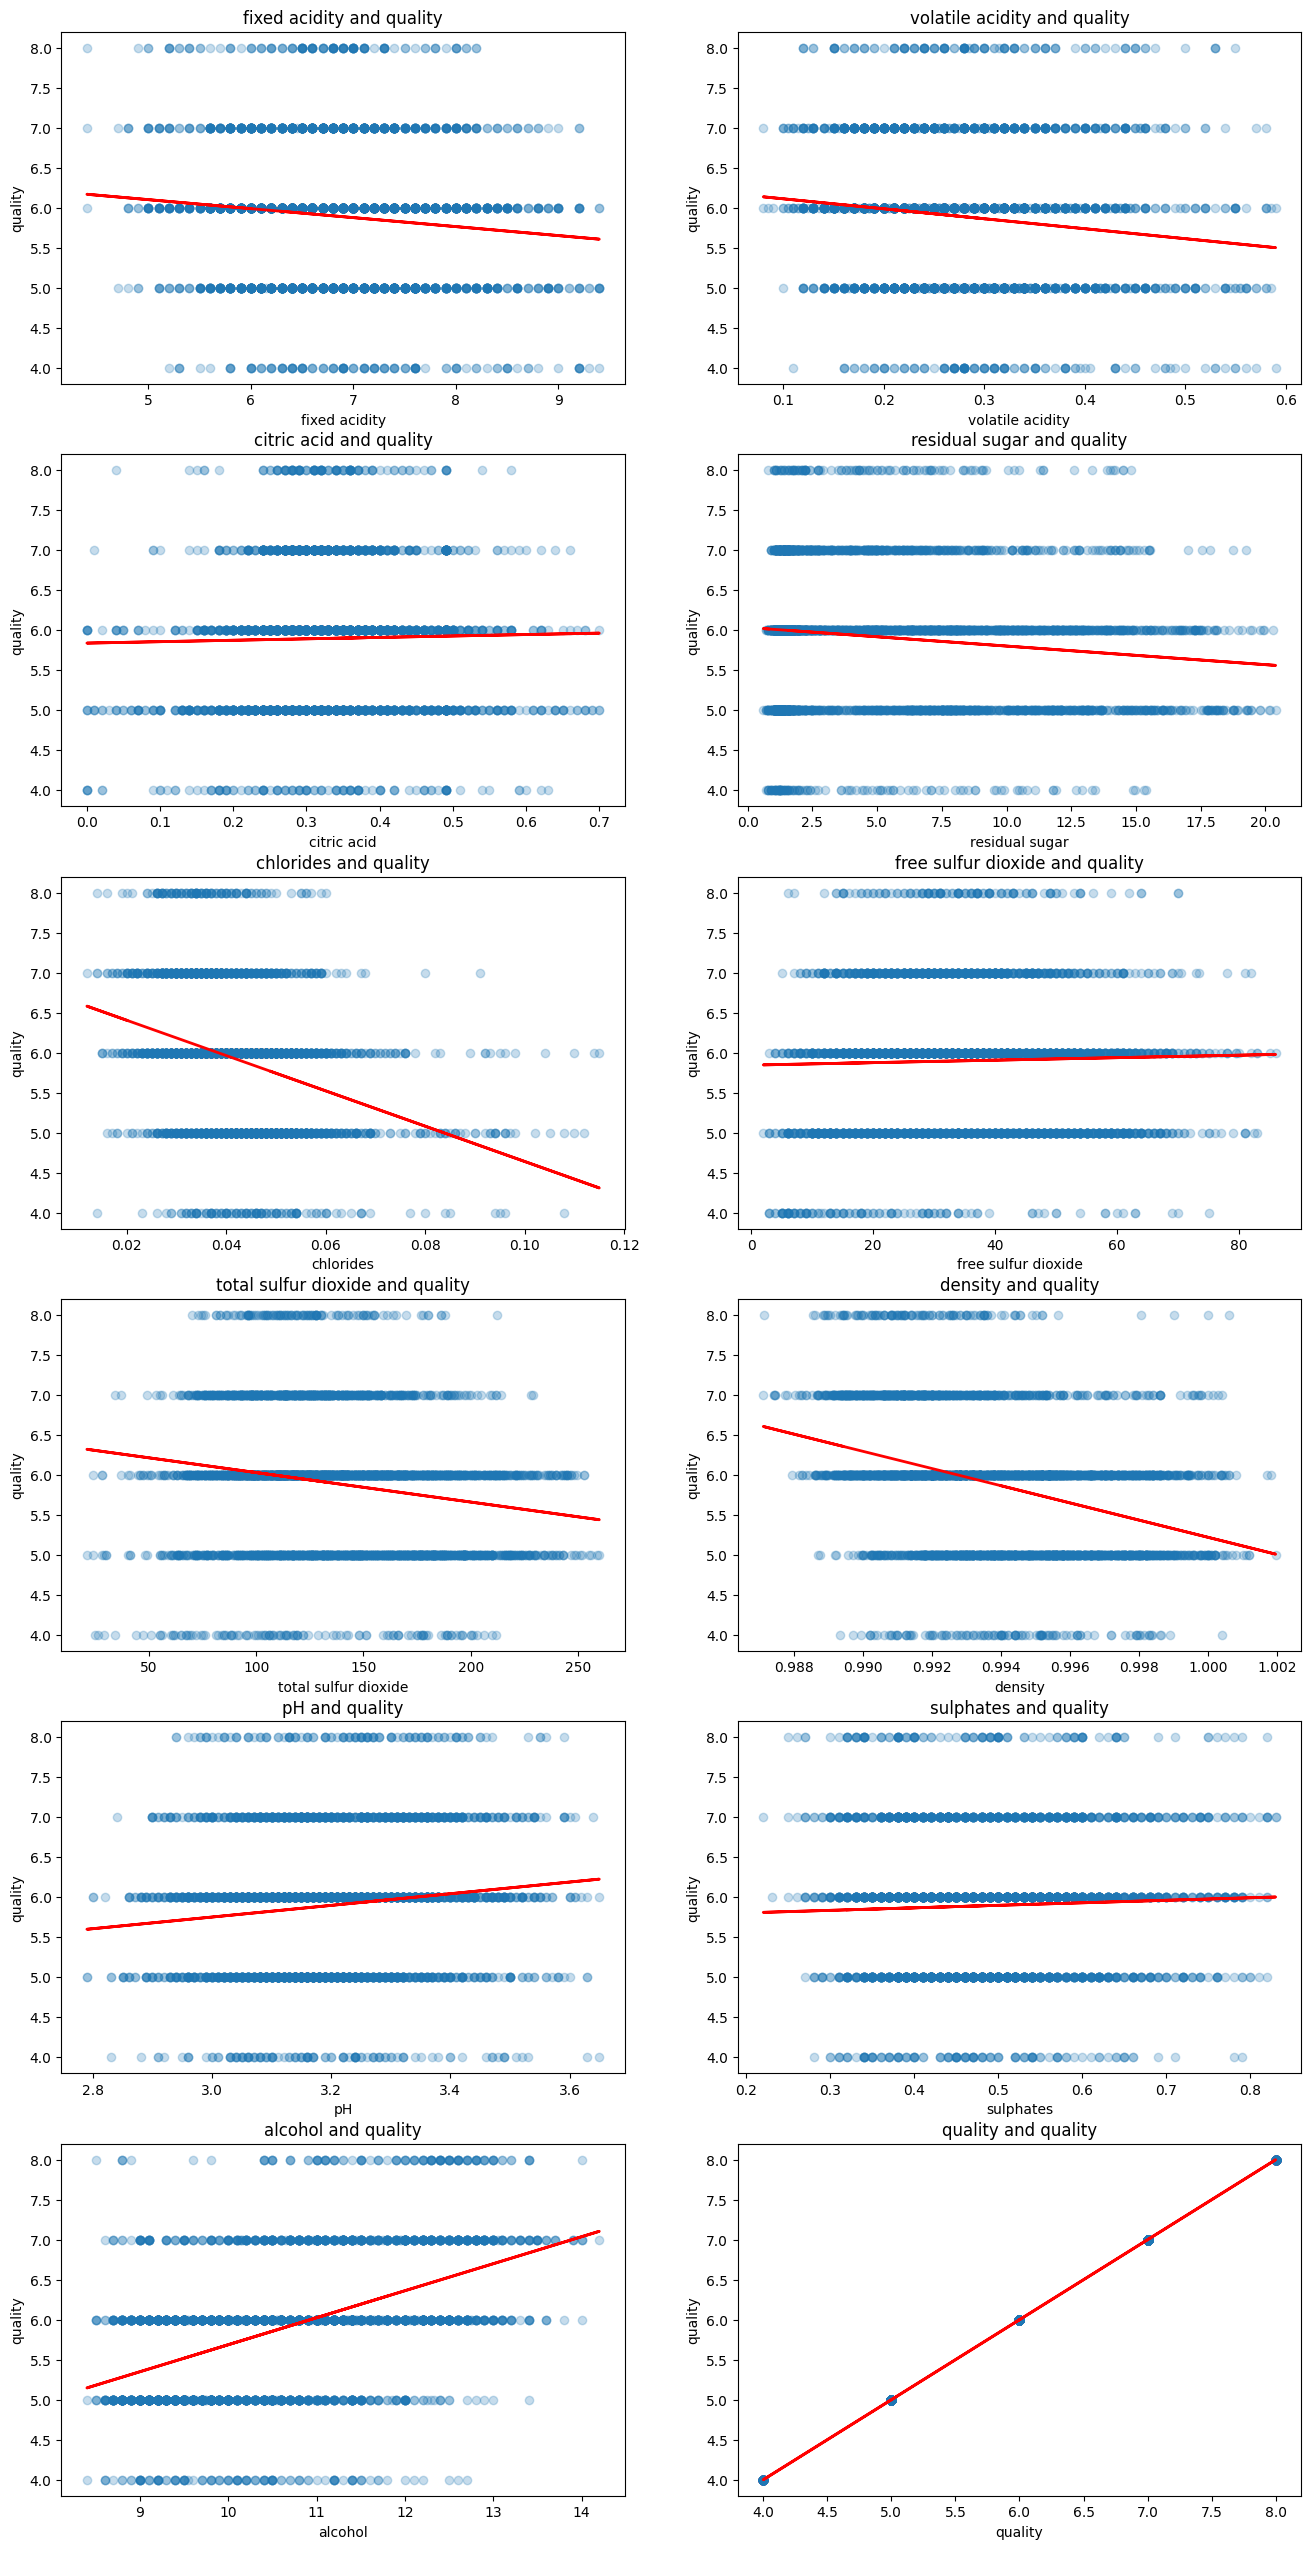

In [246]:
col = df_whitewine.shape[1]//2
fig, axes = plt.subplots(nrows=col,ncols=2,figsize=(16,32))
for i in range(0,col):
    for j in range(0,2):
        axes[i,j].scatter(df_whitewine.iloc[:,(i*2+j)], df_whitewine["quality"], alpha=0.25)
        axes[i,j].set_title(df_whitewine.columns[i*2+j]+" and quality")
        axes[i,j].set_ylabel("quality")
        axes[i,j].set_xlabel(df_whitewine.columns[i*2+j])
        X = df_whitewine.iloc[:,(i*2+j)].values.reshape(-1, 1)  # Features (pH values)
        y = df_whitewine['quality'].values  # Target variable (wine quality)

        # Creating a linear regression model
        model = LinearRegression()
        model.fit(X, y) 
        predicted_quality = model.predict(X)

        # Plotting the regression line
        axes[i,j].plot(df_whitewine.iloc[:,(i*2+j)], predicted_quality, color='red', linewidth=2, label='Linear Regression Line')

Heat map

Text(0.5, 1.0, 'Red wine correlation')

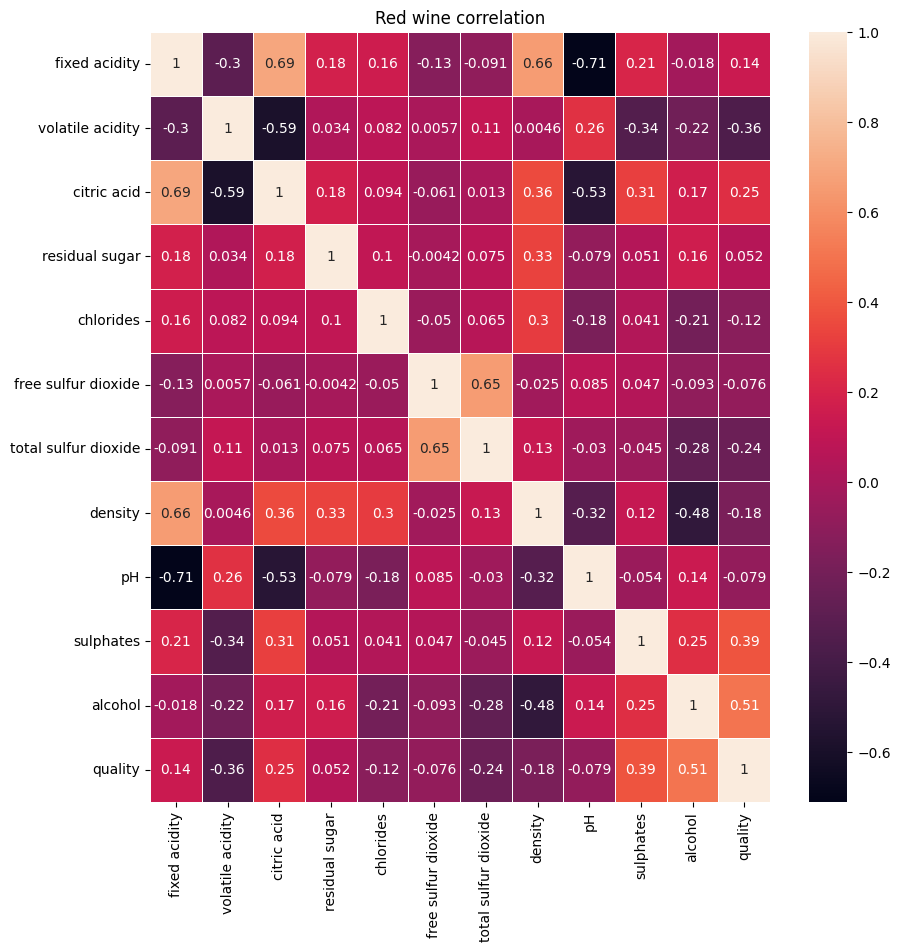

In [247]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_redwine.corr(),annot=True,linewidths=.5,ax=ax)
plt.title("Red wine correlation")

Text(0.5, 1.0, 'White wine correlation')

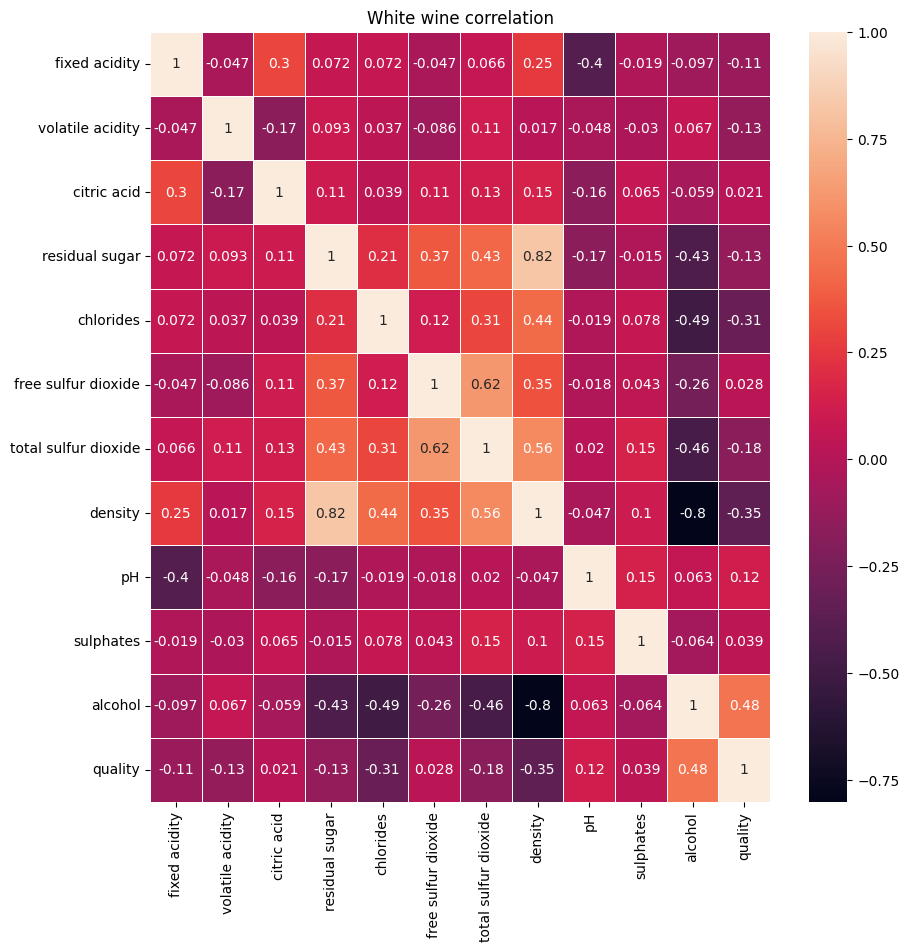

In [248]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_whitewine.corr(),annot=True,linewidths=.5,ax=ax)
plt.title("White wine correlation")

Wine Quality Relationship

<Axes: title={'center': 'Red Wine Quality Relationship'}>

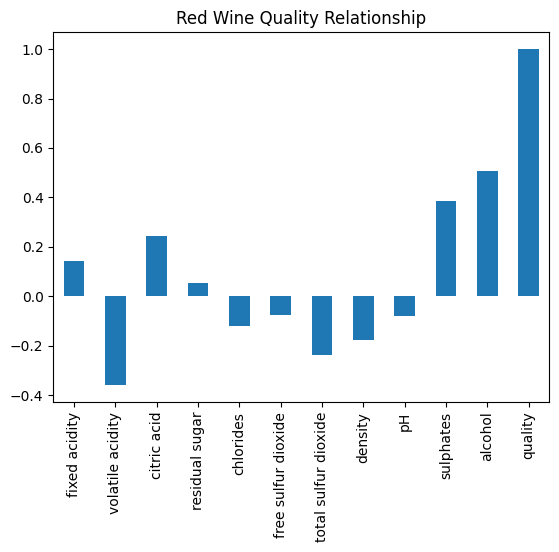

In [249]:
df_redwine.corr()["quality"].plot.bar(title="Red Wine Quality Relationship")

<Axes: title={'center': 'White Wine Quality Relationship'}>

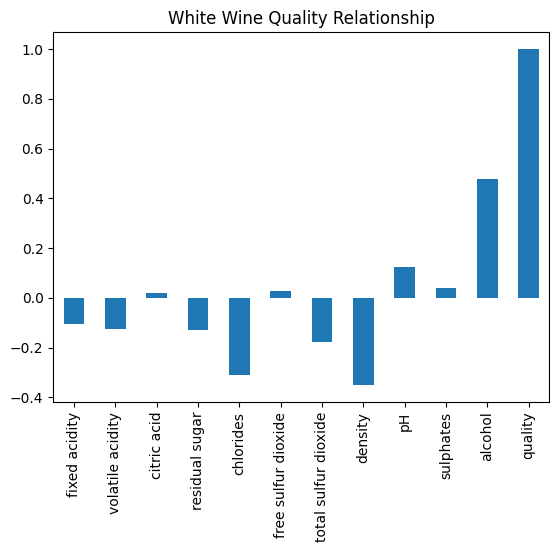

In [250]:
df_whitewine.corr()["quality"].plot.bar(title="White Wine Quality Relationship")

R^2 for training set: 1.0
R^2 for validation set: 0.6260162601626016
MSE based on SKLearn metrics: 0.483739837398374
RMSLE based on SKLearn metrics: 0.10417984161116582
F1 score: [0.         0.73043478 0.6        0.40816327 0.        ]
Accuracy Score from SKLearn metrics: 0.6260162601626016
R^2 for training set: 1.0
R^2 for validation set: 0.6056910569105691
MSE based on SKLearn metrics: 0.5040650406504065
RMSLE based on SKLearn metrics: 0.10665339673000909
F1 score: [0.16666667 0.70222222 0.58415842 0.40816327 0.        ]
Accuracy Score from SKLearn metrics: 0.6056910569105691


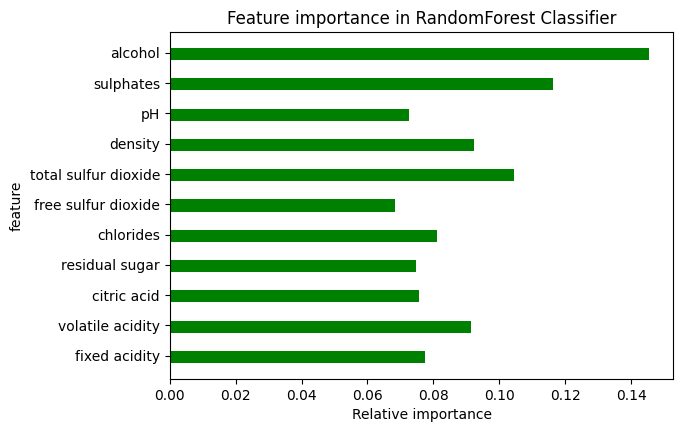

<Figure size 500x500 with 0 Axes>

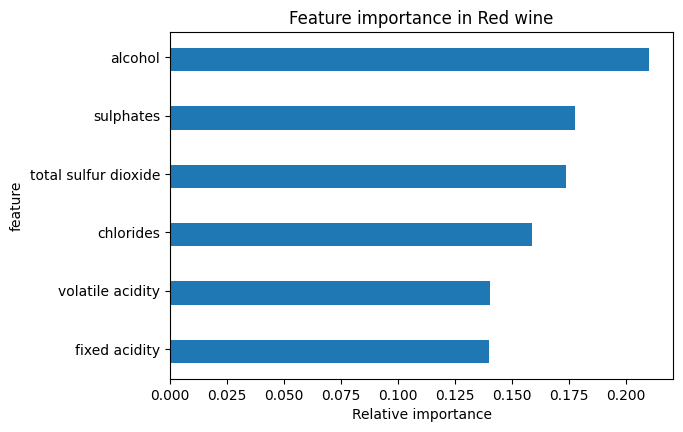

<Figure size 500x500 with 0 Axes>

In [259]:
X=df_redwine.drop('quality', axis=1)
y=df_redwine.quality
m = RFC(n_estimators=20, n_jobs=-1)
m.fit(X,y)
m.score(X,y)
#First, lets separate the sets into separate dataframes by quality
df3 = df_redwine[(df_redwine.quality==3)]
df4 = df_redwine[(df_redwine.quality==4)]
df5 = df_redwine[(df_redwine.quality==5)]
df6 = df_redwine[(df_redwine.quality==6)]
df7 = df_redwine[(df_redwine.quality==7)]
df8 = df_redwine[(df_redwine.quality==8)]

# for i in df_redwine.groupby("quality"):
    
# df3, df4, df5, df6, df7, df8 = [x for _, x in df_redwine.groupby('quality')]
frames = [df3, df4, df5, df6, df7, df8]

percent_trn = 0.80
X_train = pd.DataFrame()
X_valid = pd.DataFrame()
y_train = pd.DataFrame()
y_valid = pd.DataFrame()

for df in frames:
    X_t = df.drop('quality', axis=1).sample(frac=percent_trn)
    X_v = df.drop('quality', axis=1).drop(X_t.index)
    y_t = df.quality[X_t.index]
    y_v = df.quality[X_v.index]
    X_train = pd.concat([X_train, X_t], axis=0)
    X_valid = pd.concat([X_valid, X_v], axis=0)
    y_train = pd.concat([y_train, y_t], axis=0)
    y_valid = pd.concat([y_valid, y_v], axis=0)
    
y_valid = y_valid.squeeze()
y_train = y_train.squeeze()
#train model on training set

def print_score(m):
    print('R^2 for training set:', m.score(X_train, y_train))
    print('R^2 for validation set:', m.score(X_valid, y_valid))

    # you can also use SKLearn.metrics to calculate MSE: 
    print('MSE based on SKLearn metrics:', mean_squared_error(y_valid, m.predict(X_valid), multioutput='uniform_average'))
    print('RMSLE based on SKLearn metrics:', math.sqrt(mean_squared_log_error(y_valid, m.predict(X_valid), multioutput='uniform_average')))
    print('F1 score:', f1_score(y_valid, m.predict(X_valid), average = None))
    print('Accuracy Score from SKLearn metrics:', accuracy_score(y_valid, m.predict(X_valid)))

m = RFC(n_estimators=100, max_depth=30, n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

col = df_redwine.columns.drop('quality')
y = m.feature_importances_
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

#try dropping columns that either have low correlation with Quality, or columns that have high correlation with another independent variable
X_train = X_train.drop(columns = ['residual sugar', 'free sulfur dioxide','pH','citric acid','density'])
X_valid = X_valid.drop(columns = ['residual sugar', 'free sulfur dioxide','pH','citric acid','density'])

m = RFC(n_estimators=30, max_depth=30, n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

col = X_train.columns
y = m.feature_importances_
y=np.sort(y)
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width)
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in Red wine')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)